Matplotlib is building the font cache; this may take a moment.


(400, 2000, 3)


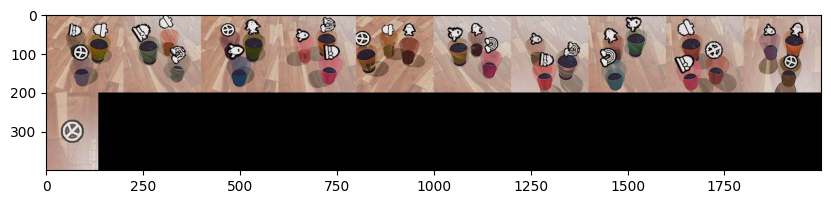

In [2]:
import cv2
import matplotlib.pyplot as plt 

# Đọc ảnh lớn
img = cv2.imread('CloneProject-7/train/images/9835266098_jpg.rf.44b8b548246399a93efacc6c48a12eaa.jpg')
print(img.shape)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


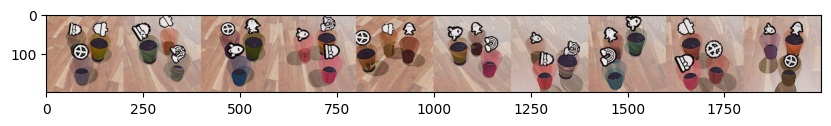

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img[0:200, :], cv2.COLOR_BGR2RGB))


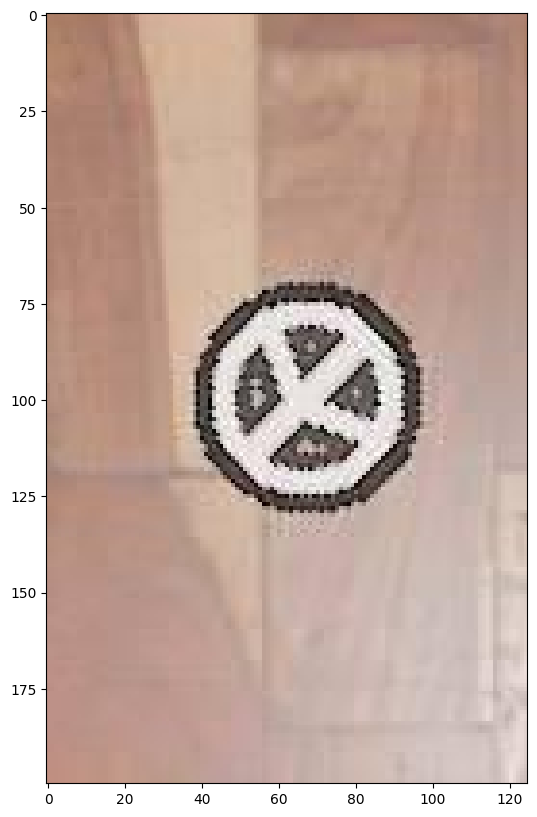

In [11]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img[200:400, 0:125], cv2.COLOR_BGR2RGB))


In [12]:
height, width = img.shape[:2]

top_imgs = img[0:200, :]

sub_img_w = width // 10

imgs = []
for i in range(10):
    x1 = i * sub_img_w
    x2 = (i + 1) * sub_img_w
    sub_img = top_imgs[:, x1:x2]
    imgs.append(sub_img)
    # cv2.imwrite(f'sub_img_{i+1}.jpg', sub_img)


0: 128x640 31 icons, 33.0ms
Speed: 4.1ms preprocess, 33.0ms inference, 5.5ms postprocess per image at shape (1, 3, 128, 640)


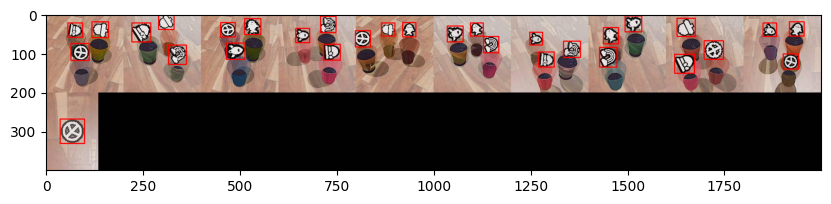

In [3]:
from ultralytics import YOLO

MODEL_PATH = 'weights/best.pt'  # Thay bằng đường dẫn model của bạn
IMAGE_PATH = 'CloneProject-7/train/images/9835266098_jpg.rf.44b8b548246399a93efacc6c48a12eaa.jpg'  # Thay bằng đường dẫn ảnh captcha

# Load model YOLOv8 đã train
model = YOLO(MODEL_PATH)
img = cv2.imread(IMAGE_PATH)
height, width = img.shape[:2]

icon_request_img = img[200:400, 0:125]

# 2. Cắt 10 ảnh nhỏ phía trên
sub_img_w = width // 10
top_imgs = img[0:200, :]
imgs = [top_imgs[:, i*sub_img_w:(i+1)*sub_img_w] for i in range(10)]

#Detect các icon trên ảnh gốc
results = model(img)
#Vẽ bounding box
for result in results:
    boxes = result.boxes.xyxy
    for box in boxes:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))





0: 128x640 31 icons, 22.4ms
Speed: 1.2ms preprocess, 22.4ms inference, 1.6ms postprocess per image at shape (1, 3, 128, 640)


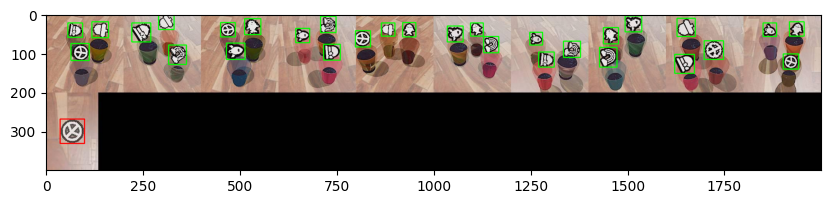

In [4]:
import cv2
from ultralytics import YOLO
import numpy as np

MODEL_PATH = 'weights/best.pt'  # Thay bằng đường dẫn model của bạn
IMAGE_PATH = 'CloneProject-7/train/images/9835266098_jpg.rf.44b8b548246399a93efacc6c48a12eaa.jpg'  # Thay bằng đường dẫn ảnh captcha

# Load model YOLOv8 đã train
model = YOLO(MODEL_PATH)
img = cv2.imread(IMAGE_PATH)

#Cắt và lưu tọa độ x1,x2 của ảnh con
sub_img_w = width // 10
top_imgs = img[0:200, :]
imgs = [top_imgs[:, i*sub_img_w:(i+1)*sub_img_w] for i in range(10)]
sub_img_coords = [(i*sub_img_w, (i+1)*sub_img_w) for i in range(10)]


# Detect các icon trên ảnh gốc
results = model(img)
#Lưu tọa độ các icon của ảnh con, icon request (icon request là icon có tọa độ nằm trong khoảng img[200:400, 0:125])
img_copy = img.copy()
icon_coords = []
icon_request_coords = []
for result in results:
    boxes = result.boxes.xyxy
    for box in boxes:
        x1, y1, x2, y2 = map(int, box)

        if y1 >= 200 and y2 <= 400 and x1 >= 0 and x2 <= 125:
            icon_request_coords.append((x1, y1, x2, y2))
        else:
            icon_coords.append((x1, y1, x2, y2))

#vẽ bounding box cho các icon, icon request sẽ đánh màu xanh
for icon_request_coord in icon_request_coords:
    cv2.rectangle(img_copy, (icon_request_coord[0], icon_request_coord[1]), (icon_request_coord[2], icon_request_coord[3]), (0, 0, 255), 2)

for icon_coord in icon_coords:
    cv2.rectangle(img_copy, (icon_coord[0], icon_coord[1]), (icon_coord[2], icon_coord[3]), (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))








0: 128x640 14 icons, 23.2ms
Speed: 1.1ms preprocess, 23.2ms inference, 0.9ms postprocess per image at shape (1, 3, 128, 640)

0: 128x640 14 icons, 20.0ms
Speed: 1.0ms preprocess, 20.0ms inference, 0.5ms postprocess per image at shape (1, 3, 128, 640)
Đã phát hiện 13 biểu tượng trong vùng trên cùng.
Ngưỡng tương đồng được sử dụng: 0.800
Tìm thấy 13 biểu tượng khớp với ngưỡng 0.800.


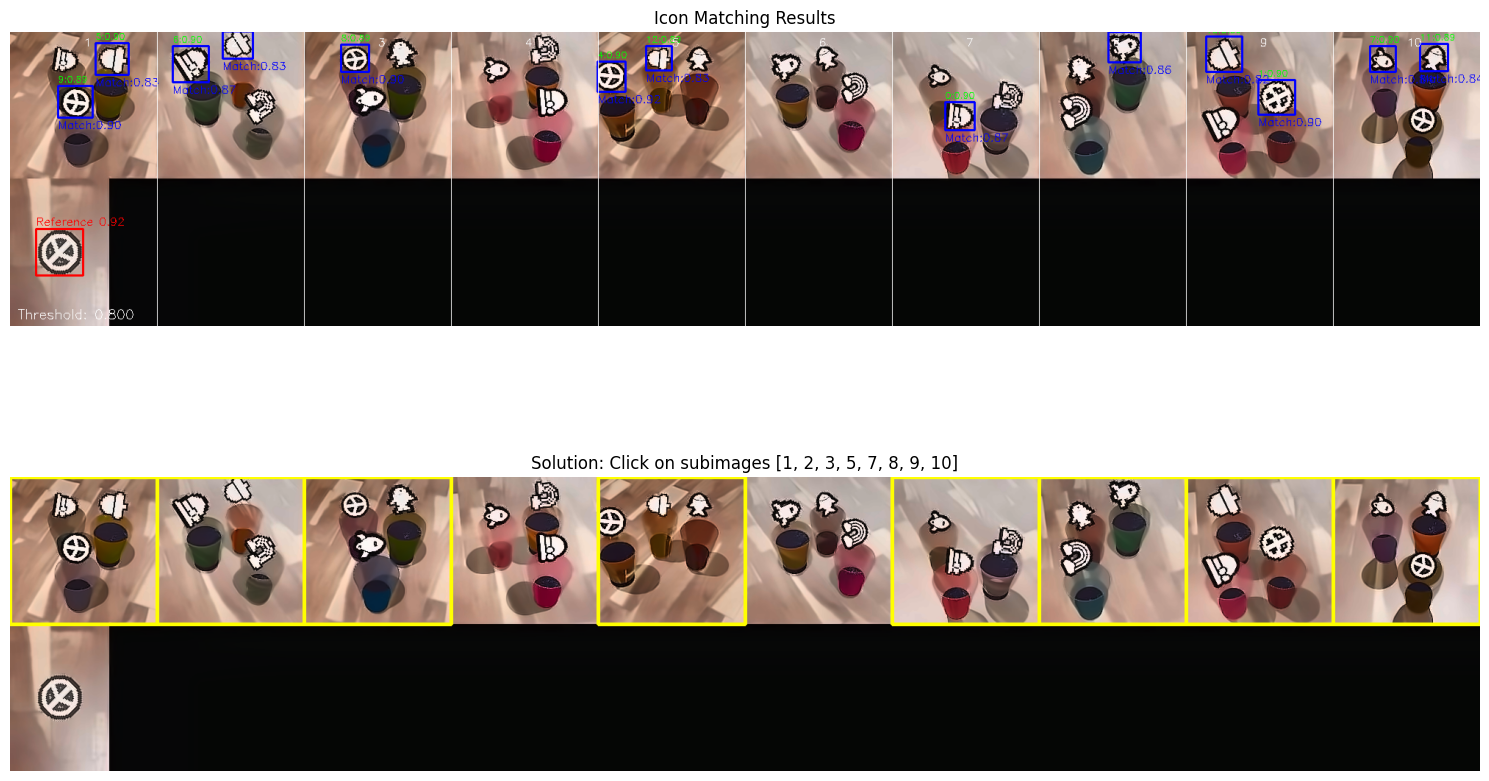


Ngưỡng tương đồng được sử dụng: 0.800
Biểu tượng khớp được tìm thấy trong các ảnh con sau:
Ảnh con 1:
  - Icon 9 (Độ tương đồng: 0.90)
  - Icon 5 (Độ tương đồng: 0.83)
Ảnh con 2:
  - Icon 6 (Độ tương đồng: 0.87)
  - Icon 2 (Độ tương đồng: 0.83)
Ảnh con 3:
  - Icon 8 (Độ tương đồng: 0.90)
Ảnh con 5:
  - Icon 4 (Độ tương đồng: 0.92)
  - Icon 12 (Độ tương đồng: 0.83)
Ảnh con 7:
  - Icon 0 (Độ tương đồng: 0.87)
Ảnh con 8:
  - Icon 3 (Độ tương đồng: 0.86)
Ảnh con 9:
  - Icon 1 (Độ tương đồng: 0.90)
  - Icon 10 (Độ tương đồng: 0.82)
Ảnh con 10:
  - Icon 11 (Độ tương đồng: 0.84)
  - Icon 7 (Độ tương đồng: 0.84)

Thời gian xử lý: 3.78 giây
Giải pháp CAPTCHA: Nhấp vào các ảnh con [1, 2, 3, 5, 7, 8, 9, 10]
Giải pháp CAPTCHA: [1, 2, 3, 5, 7, 8, 9, 10]


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine, euclidean
from sklearn.preprocessing import normalize
from ultralytics import YOLO
import time
from skimage.feature import hog
from skimage import exposure

def load_and_preprocess_image(image_path):
    """Load and preprocess the image containing all subimages and reference icon."""
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Không thể tải hình ảnh từ {image_path}")
    
    # Cải thiện: Áp dụng các bước tiền xử lý
    # 1. Chuyển đổi sang không gian màu khác để tăng độ tương phản
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    
    # 2. Cân bằng histogram cho kênh L
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    
    # 3. Hợp nhất các kênh
    enhanced_lab = cv2.merge((cl, a, b))
    enhanced_img = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2BGR)
    
    # 4. Làm giảm nhiễu
    enhanced_img = cv2.fastNlMeansDenoisingColored(enhanced_img, None, 10, 10, 7, 21)
    
    return enhanced_img

def extract_reference_icon(yolo_model, image, confidence_threshold=0.5):
    """Extract the reference icon (marked in red) with improved confidence threshold."""
    results_yolo = yolo_model(image, conf=confidence_threshold)
    
    # Tìm kiếm biểu tượng tham chiếu với độ tin cậy cao nhất trong vùng dưới
    best_confidence = 0
    best_box = None
    
    for result in results_yolo:
        boxes = result.boxes.xyxy
        confidences = result.boxes.conf
        
        for i, box in enumerate(boxes):
            x1, y1, x2, y2 = map(int, box)
            conf = float(confidences[i])
            
            # Kiểm tra nếu hộp nằm trong vùng tham chiếu (phía dưới)
            if y1 >= 200 and conf > best_confidence:
                best_confidence = conf
                best_box = (x1, y1, x2, y2)
    
    if best_box:
        x1, y1, x2, y2 = best_box
        return image[y1:y2, x1:x2], best_box, best_confidence
    
    # Thử phương pháp dự phòng nếu YOLO không tìm thấy
    # Phát hiện vùng đỏ (thường dùng để đánh dấu biểu tượng tham chiếu)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    mask1 = cv2.inRange(hsv, lower_red, upper_red)
    
    lower_red = np.array([160, 100, 100])
    upper_red = np.array([180, 255, 255])
    mask2 = cv2.inRange(hsv, lower_red, upper_red)
    
    red_mask = mask1 + mask2
    
    # Tìm contour trong vùng đỏ
    contours, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)
        if y >= 200:  # Vùng dưới
            return image[y:y+h, x:x+w], (x, y, x+w, y+h), 0.5
    
    return None, None, 0

def extract_detected_icons(yolo_model, image, confidence_threshold=0.5):
    """Extract all detected icons in the top area of the image with improved confidence threshold."""
    results_yolo = yolo_model(image, conf=confidence_threshold)
    icons = []
    icon_positions = []
    confidences = []
    
    for result in results_yolo:
        boxes = result.boxes.xyxy
        confs = result.boxes.conf
        
        for i, box in enumerate(boxes):
            x1, y1, x2, y2 = map(int, box)
            conf = float(confs[i])
            
            # Chỉ xem xét biểu tượng ở vùng trên với độ tin cậy đủ cao
            if y1 <= 200:
                icon = image[y1:y2, x1:x2]
                icons.append(icon)
                icon_positions.append((x1, y1, x2, y2))
                confidences.append(conf)
    
    return icons, icon_positions, confidences

def compute_features(icon, feature_types=["color", "hog", "sift"]):
    """
    Compute multiple feature types for better comparison:
    - Color histograms (RGB and HSV)
    - HOG features
    - SIFT features
    """
    if icon is None or icon.size == 0:
        # Return zeros with appropriate size based on feature types
        feature_size = 0
        if "color" in feature_types: feature_size += 96
        if "hog" in feature_types: feature_size += 324
        if "sift" in feature_types: feature_size += 128
        return np.zeros(feature_size)
        
    # Resize to standard size
    icon_resized = cv2.resize(icon, (64, 64))
    gray = cv2.cvtColor(icon_resized, cv2.COLOR_BGR2GRAY)
    
    all_features = []
    
    # 1. Color histogram features (RGB and HSV)
    if "color" in feature_types:
        # RGB histogram
        color_features = []
        for i in range(3):  # For each color channel
            hist = cv2.calcHist([icon_resized], [i], None, [32], [0, 256])
            cv2.normalize(hist, hist)
            color_features.extend(hist.flatten())
        
        # HSV histogram for better illumination invariance
        hsv = cv2.cvtColor(icon_resized, cv2.COLOR_BGR2HSV)
        hsv_features = []
        channels = [0, 1]  # Use only Hue and Saturation
        for i in channels:
            hist = cv2.calcHist([hsv], [i], None, [16], [0, 256])
            cv2.normalize(hist, hist)
            hsv_features.extend(hist.flatten())
            
        all_features.extend(color_features)
        all_features.extend(hsv_features)
    
    # 2. HOG features for shape description
    if "hog" in feature_types:
        try:
            fd, hog_image = hog(gray, orientations=8, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), visualize=True)
            all_features.extend(fd)
        except:
            all_features.extend(np.zeros(324))  # Default HOG size for these params
    
    # 3. SIFT features for distinct keypoints
    if "sift" in feature_types:
        try:
            sift = cv2.SIFT_create()
            keypoints, descriptors = sift.detectAndCompute(gray, None)
            if descriptors is not None and len(descriptors) > 0:
                # Use average of descriptors as feature
                sift_feature = np.mean(descriptors, axis=0)
            else:
                sift_feature = np.zeros(128)  # Default SIFT descriptor size
            all_features.extend(sift_feature)
        except:
            all_features.extend(np.zeros(128))
    
    # Normalize the combined features
    feature_vector = np.array(all_features)
    if len(feature_vector) > 0:
        feature_vector = normalize(feature_vector.reshape(1, -1))[0]
    
    return feature_vector

def compare_icons(reference_features, icons, icon_positions, icon_confidences=None, 
                 similarity_methods=["cosine", "euclidean"], adaptive_threshold=True):
    """
    Compare reference icon with all detected icons using multiple similarity measures
    and optional adaptive thresholding.
    """
    matches = []
    similarity_scores = []
    
    # Tính toán ngưỡng thích ứng nếu được bật
    if adaptive_threshold:
        all_similarities = []
        for i, icon in enumerate(icons):
            icon_features = compute_features(icon)
            
            # Tính toán điểm tương đồng sử dụng nhiều phương pháp
            similarities = []
            if "cosine" in similarity_methods:
                cosine_sim = 1 - cosine(reference_features, icon_features)
                similarities.append(cosine_sim)
            
            if "euclidean" in similarity_methods:
                # Chuyển đổi khoảng cách Euclidean thành điểm tương đồng
                euclidean_dist = euclidean(reference_features, icon_features)
                euclidean_sim = 1 / (1 + euclidean_dist)  # Chuyển đổi thành khoảng [0,1]
                similarities.append(euclidean_sim)
            
            # Tính điểm tương đồng trung bình
            avg_similarity = np.mean(similarities)
            all_similarities.append(avg_similarity)
        
        # Tính ngưỡng thích ứng dựa trên phân phối điểm tương đồng
        if all_similarities:
            similarities_array = np.array(all_similarities)
            mean_sim = np.mean(similarities_array)
            std_sim = np.std(similarities_array)
            
            # Ngưỡng thích ứng: chọn các điểm nằm trên X độ lệch chuẩn so với giá trị trung bình
            threshold = mean_sim + 1.0 * std_sim
            
            # Đảm bảo ngưỡng nằm trong khoảng hợp lý
            threshold = max(0.3, min(threshold, 0.8))
        else:
            threshold = 0.3  # Ngưỡng mặc định
    else:
        threshold = 0.3  # Ngưỡng cố định
    
    # So sánh thực tế với ngưỡng đã xác định
    for i, icon in enumerate(icons):
        icon_features = compute_features(icon)
        
        # Tính toán điểm tương đồng sử dụng nhiều phương pháp
        similarities = []
        if "cosine" in similarity_methods:
            cosine_sim = 1 - cosine(reference_features, icon_features)
            similarities.append(cosine_sim)
        
        if "euclidean" in similarity_methods:
            euclidean_dist = euclidean(reference_features, icon_features)
            euclidean_sim = 1 / (1 + euclidean_dist)
            similarities.append(euclidean_sim)
        
        # Tính điểm tương đồng trung bình
        avg_similarity = np.mean(similarities)
        similarity_scores.append(avg_similarity)
        
        # Áp dụng hệ số tin cậy YOLO nếu có
        if icon_confidences:
            confidence_factor = icon_confidences[i]
            # Kết hợp điểm tương đồng với độ tin cậy YOLO
            weighted_similarity = 0.7 * avg_similarity + 0.3 * confidence_factor
        else:
            weighted_similarity = avg_similarity
            
        if weighted_similarity > threshold:
            matches.append((i, icon_positions[i], weighted_similarity))
    
    # Sắp xếp các kết quả khớp theo điểm tương đồng (cao nhất đầu tiên)
    matches.sort(key=lambda x: x[2], reverse=True)
    
    print(f"Ngưỡng tương đồng được sử dụng: {threshold:.3f}")
    return matches, similarity_scores, threshold

def identify_subimages(matches, image_width, num_subimages=10):
    """Identify which subimage each matching icon belongs to."""
    subimage_width = image_width // num_subimages
    results = []
    
    for match_idx, (x1, y1, x2, y2), similarity in matches:
        # Tính toán tâm của biểu tượng
        center_x = (x1 + x2) // 2
        
        # Xác định biểu tượng thuộc ảnh con nào
        subimage_idx = center_x // subimage_width
        
        results.append((subimage_idx, match_idx, similarity))
    
    return results

def visualize_results(image, reference_icon_coords, ref_confidence, matches, icon_positions, 
                      icon_confidences, subimage_results, threshold):
    """Visualize the matching results with improved visualization."""
    result_img = image.copy()
    
    # Vẽ biểu tượng tham chiếu
    if reference_icon_coords:
        x1, y1, x2, y2 = reference_icon_coords
        cv2.rectangle(result_img, (x1, y1), (x2, y2), (0, 0, 255), 2)
        cv2.putText(result_img, f"Reference {ref_confidence:.2f}", (x1, y1-5), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
    
    # Vẽ tất cả các biểu tượng đã phát hiện với độ tin cậy
    for i, ((x1, y1, x2, y2), conf) in enumerate(zip(icon_positions, icon_confidences)):
        label = f"{i}:{conf:.2f}"
        cv2.rectangle(result_img, (x1, y1), (x2, y2), (0, 255, 0), 1)
        cv2.putText(result_img, label, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 255, 0), 1)
    
    # Đánh dấu các biểu tượng khớp
    for match_idx, (x1, y1, x2, y2), similarity in matches:
        cv2.rectangle(result_img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        label = f"Match:{similarity:.2f}"
        cv2.putText(result_img, label, (x1, y2+15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
    
    # Vẽ đường phân chia ảnh con
    subimage_width = image.shape[1] // 10
    for i in range(1, 10):
        x = i * subimage_width
        cv2.line(result_img, (x, 0), (x, image.shape[0]), (255, 255, 255), 1)
    
    # Thêm số thứ tự ảnh con
    for i in range(10):
        x = i * subimage_width + subimage_width // 2
        cv2.putText(result_img, str(i+1), (x, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
    
    # Tạo ảnh kết quả phụ hiển thị các ảnh con được chọn
    subimages_to_click = sorted(list(set([subimg_idx + 1 for subimg_idx, _, _ in subimage_results])))
    solution_img = image.copy()
    
    # Đánh dấu các ảnh con cần nhấp vào
    for subimg_idx in [idx-1 for idx in subimages_to_click]:
        x1 = subimg_idx * subimage_width
        x2 = (subimg_idx + 1) * subimage_width
        cv2.rectangle(solution_img, (x1, 0), (x2, 200), (0, 255, 255), 3)
        
    # Hiển thị thông tin về ngưỡng và kết quả
    cv2.putText(result_img, f"Threshold: {threshold:.3f}", (10, image.shape[0]-10), 
               cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1)
    
    # Hiển thị kết quả
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 1, 1)
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.title("Icon Matching Results")
    plt.axis('off')
    
    plt.subplot(2, 1, 2)
    plt.imshow(cv2.cvtColor(solution_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Solution: Click on subimages {subimages_to_click}")
    plt.axis('off')
    
    plt.tight_layout()
    plt.savefig('captcha_results.png', dpi=300)
    plt.show()
    
    # In kết quả
    print(f"\nNgưỡng tương đồng được sử dụng: {threshold:.3f}")
    print("Biểu tượng khớp được tìm thấy trong các ảnh con sau:")
    subimage_matches = {}
    for subimage_idx, match_idx, similarity in subimage_results:
        subimage_number = subimage_idx + 1
        if subimage_number not in subimage_matches:
            subimage_matches[subimage_number] = []
        subimage_matches[subimage_number].append((match_idx, similarity))
    
    for subimage_number in sorted(subimage_matches.keys()):
        matches_in_subimage = subimage_matches[subimage_number]
        print(f"Ảnh con {subimage_number}:")
        for match_idx, similarity in matches_in_subimage:
            print(f"  - Icon {match_idx} (Độ tương đồng: {similarity:.2f})")

def process_captcha(image_path, yolo_model, threshold=None, num_subimages=10, 
                    confidence_threshold=0.5, adaptive_threshold=True):
    """Main function to process the CAPTCHA image and find matching icons with improvements."""
    start_time = time.time()
    
    # Tải và tiền xử lý hình ảnh
    image = load_and_preprocess_image(image_path)
    
    # Trích xuất biểu tượng tham chiếu
    reference_icon, ref_coords, ref_confidence = extract_reference_icon(yolo_model, image, confidence_threshold)
    if reference_icon is None:
        print("Không tìm thấy biểu tượng tham chiếu! Vui lòng kiểm tra điều kiện phát hiện.")
        return []
    
    # Trích xuất các biểu tượng đã phát hiện
    icons, icon_positions, icon_confidences = extract_detected_icons(yolo_model, image, confidence_threshold)
    if len(icons) == 0:
        print("Không phát hiện được biểu tượng nào trong vùng trên cùng!")
        return []
    
    print(f"Đã phát hiện {len(icons)} biểu tượng trong vùng trên cùng.")
    
    # Tính toán đặc trưng cho biểu tượng tham chiếu
    reference_features = compute_features(reference_icon, feature_types=["color", "hog", "sift"])
    
    # So sánh biểu tượng tham chiếu với tất cả các biểu tượng đã phát hiện
    matches, similarity_scores, used_threshold = compare_icons(
        reference_features, icons, icon_positions, icon_confidences,
        similarity_methods=["cosine", "euclidean"], 
        adaptive_threshold=adaptive_threshold
    )
    
    print(f"Tìm thấy {len(matches)} biểu tượng khớp với ngưỡng {used_threshold:.3f}.")
    
    # Xác định mỗi biểu tượng khớp thuộc ảnh con nào
    subimage_results = identify_subimages(matches, image.shape[1], num_subimages)
    
    # Hiển thị kết quả
    visualize_results(image, ref_coords, ref_confidence, matches, icon_positions, 
                     icon_confidences, subimage_results, used_threshold)
    
    # Lấy các chỉ số ảnh con duy nhất để nhấp vào
    subimages_to_click = sorted(list(set([subimg_idx + 1 for subimg_idx, _, _ in subimage_results])))
    
    # In thời gian xử lý
    elapsed_time = time.time() - start_time
    print(f"\nThời gian xử lý: {elapsed_time:.2f} giây")
    print(f"Giải pháp CAPTCHA: Nhấp vào các ảnh con {subimages_to_click}")
    
    return subimages_to_click

def rotate_icon(icon, angle):
    """Rotate an icon by the specified angle."""
    height, width = icon.shape[:2]
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(icon, rotation_matrix, (width, height), 
                             borderMode=cv2.BORDER_REPLICATE)
    return rotated

def data_augmentation(icon):
    """Generate augmented versions of the icon for more robust matching."""
    augmented_icons = []
    
    # Thêm icon gốc
    augmented_icons.append(icon)
    
    # Xoay icon
    for angle in [10, -10, 20, -20]:
        rotated = rotate_icon(icon, angle)
        augmented_icons.append(rotated)
    
    # Thay đổi độ sáng
    bright = cv2.convertScaleAbs(icon, alpha=1.2, beta=10)
    dark = cv2.convertScaleAbs(icon, alpha=0.8, beta=-10)
    augmented_icons.append(bright)
    augmented_icons.append(dark)
    
    # Lật ngang
    flipped = cv2.flip(icon, 1)
    augmented_icons.append(flipped)
    
    return augmented_icons

def solve_captcha(image_path, model_path, confidence_threshold=0.5, adaptive_threshold=True):
    """Solve CAPTCHA using the trained YOLOv8 model with improvements."""
    # Tải model YOLOv8
    try:
        model = YOLO(model_path)
    except Exception as e:
        print(f"Lỗi khi tải model: {e}")
        return []
    
    # Xử lý CAPTCHA
    solution = process_captcha(
        image_path, 
        model, 
        confidence_threshold=confidence_threshold,
        adaptive_threshold=adaptive_threshold
    )
    
    return solution


# Sử dụng ví dụ:
if __name__ == "__main__":
    image_path = "CloneProject-7/train/images/9835266098_jpg.rf.44b8b548246399a93efacc6c48a12eaa.jpg"
    model_path = "weights/best.pt"
    confidence_threshold = 0.89
    adaptive_threshold = True
    solution = solve_captcha(image_path, model_path, confidence_threshold, adaptive_threshold)
    print(f"Giải pháp CAPTCHA: {solution}")

In [11]:
import os
from pathlib import Path

def extract_icons_from_folder(folder_path, model_path, output_folder, confidence_threshold=0.5):
    """Extract icons from all images in a folder using YOLO model."""
    
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)
    
    # Load YOLO model
    try:
        model = YOLO(model_path)
    except Exception as e:
        print(f"Error loading model: {e}")
        return
        
    # Get list of image files
    image_files = list(Path(folder_path).glob("*.jpg")) + list(Path(folder_path).glob("*.png"))
    
    print(f"Found {len(image_files)} images")
    
    for img_path in image_files:
        try:
            # Load and preprocess image
            image = load_and_preprocess_image(str(img_path))
            
            # Run YOLO detection
            results = model(image, conf=confidence_threshold)
            
            # Extract each detected icon
            for i, result in enumerate(results):
                boxes = result.boxes.xyxy
                
                for j, box in enumerate(boxes):
                    x1, y1, x2, y2 = map(int, box)
                    icon = image[y1:y2, x1:x2]
                    
                    # Save icon
                    icon_filename = f"{img_path.stem}_icon_{j}.jpg"
                    icon_path = os.path.join(output_folder, icon_filename)
                    cv2.imwrite(icon_path, icon)
                    
            print(f"Processed {img_path.name}")
            
        except Exception as e:
            print(f"Error processing {img_path.name}: {e}")
            continue

# Extract icons from training images
train_folder = "/Users/tranthanh/Documents/SolveCaptcha/CloneProject-7/train/images"
model_path = "weights/best.pt" 
output_folder = "icon_images"

extract_icons_from_folder(train_folder, model_path, output_folder, confidence_threshold=0.5)


Found 484 images

0: 128x640 31 icons, 22.1ms
Speed: 1.4ms preprocess, 22.1ms inference, 1.2ms postprocess per image at shape (1, 3, 128, 640)
Processed 7778033967_jpg.rf.a2581065f121e9d34db5841bd2eeaa96.jpg

0: 128x640 31 icons, 22.6ms
Speed: 1.0ms preprocess, 22.6ms inference, 0.6ms postprocess per image at shape (1, 3, 128, 640)
Processed 8261015305_jpg.rf.f23a922c7711dc4aeae30ea3ac3475c3.jpg

0: 128x640 31 icons, 23.1ms
Speed: 1.1ms preprocess, 23.1ms inference, 0.6ms postprocess per image at shape (1, 3, 128, 640)
Processed 1390858056_jpg.rf.b8a76ffb7e81f819427a29b4e238c152.jpg

0: 128x640 31 icons, 23.0ms
Speed: 0.8ms preprocess, 23.0ms inference, 0.6ms postprocess per image at shape (1, 3, 128, 640)
Processed 2628836949_jpg.rf.2323c5b0ad8ce68bf8c1d8fca9c9ec63.jpg

0: 128x640 31 icons, 21.4ms
Speed: 1.1ms preprocess, 21.4ms inference, 0.7ms postprocess per image at shape (1, 3, 128, 640)
Processed 8074395626_jpg.rf.6503e8b9a5e198cadc4b48d2d2fbc6d2.jpg

0: 128x640 31 icons, 22.4ms

In [ ]:
import os
import random
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

class TwoCropsTransform:
    """Tạo hai biến thể khác nhau của cùng một ảnh"""
    def __init__(self, base_transform):
        self.base_transform = base_transform

    def __call__(self, x):
        q = self.base_transform(x)
        k = self.base_transform(x)
        return [q, k]

# Tạo các phép biến đổi để augment dữ liệu
train_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomResizedCrop(64, scale=(0.8, 1.0)),
    transforms.RandomApply([transforms.ColorJitter(0.2, 0.2, 0.2, 0.1)], p=0.8),
    transforms.RandomGrayscale(p=0.2),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Biến đổi cho đánh giá: chỉ resize và normalize
eval_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

class IconDataset(Dataset):
    """Dataset cho các icon không có nhãn"""
    def __init__(self, icons_dir, transform=None):
        self.icons_paths = [os.path.join(icons_dir, f) for f in os.listdir(icons_dir) 
                            if f.endswith(('.png', '.jpg', '.jpeg'))]
        self.transform = transform
        
    def __len__(self):
        return len(self.icons_paths)
        
    def __getitem__(self, idx):
        img_path = self.icons_paths[idx]
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        if self.transform:
            image = self.transform(image)
            
        return image
    
class SimSiam(nn.Module):
    """
    Mô hình SimSiam đơn giản với MobileNetV2 làm backbone
    """
    def __init__(self, dim=512, pred_dim=128):
        super(SimSiam, self).__init__()
        
        # Tải pretrained MobileNetV2 và loại bỏ lớp fully connected cuối
        self.encoder = models.mobilenet_v2(pretrained=True)
        
        # Thay thế lớp classifier bằng Identity
        last_channel = self.encoder.last_channel
        self.encoder.classifier = nn.Identity()
        
        # Đóng băng các lớp ban đầu
        ct = 0
        for child in self.encoder.children():
            ct += 1
            if ct < 2:  # Giữ các lớp cuối có thể fine-tune
                for param in child.parameters():
                    param.requires_grad = False
        
        # Projection MLP
        self.projector = nn.Sequential(
            nn.Linear(last_channel, last_channel),
            nn.BatchNorm1d(last_channel),
            nn.ReLU(inplace=True),
            nn.Linear(last_channel, dim)
        )
        
        # Predictor MLP
        self.predictor = nn.Sequential(
            nn.Linear(dim, pred_dim),
            nn.BatchNorm1d(pred_dim),
            nn.ReLU(inplace=True),
            nn.Linear(pred_dim, dim)
        )
        
    def forward(self, x1, x2):
        """
        Forward pass qua hai augmented views của cùng một ảnh
        """
        # Lấy biểu diễn từ encoder
        z1 = self.encoder(x1)
        z2 = self.encoder(x2)
        
        # Lấy projected
        p1 = self.projector(z1)
        p2 = self.projector(z2)
        
        # Chuẩn hóa p1 và p2
        p1 = F.normalize(p1, dim=1)
        p2 = F.normalize(p2, dim=1)
        
        # Lấy dự đoán
        q1 = self.predictor(p1)
        q2 = self.predictor(p2)
        
        # Chuẩn hóa q1 và q2
        q1 = F.normalize(q1, dim=1)
        q2 = F.normalize(q2, dim=1)
        
        return p1, p2, q1, q2
    
    def get_encoder(self):
        """
        Trả về encoder để sử dụng cho trích xuất đặc trưng
        """
        return self.encoder
    
def D(p, z):
    """
    Negative cosine similarity giữa p và z
    """
    z = z.detach()  # Stop gradient
    p = F.normalize(p, dim=1)  # L2-normalize
    z = F.normalize(z, dim=1)  # L2-normalize
    return -(p * z).sum(dim=1).mean()

def simsiam_loss(p1, p2, q1, q2):
    """
    Hàm loss cho SimSiam: trung bình của negative cosine similarity theo hai hướng
    """
    loss1 = D(q1, p2)  # q1 dự đoán p2
    loss2 = D(q2, p1)  # q2 dự đoán p1
    
    return 0.5 * (loss1 + loss2)


def train_simsiam(data_dir, output_dir, batch_size=64, epochs=100, lr=0.05, wd=1e-4, device=None):
    """
    Huấn luyện mô hình SimSiam
    """
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    print(f"Sử dụng thiết bị: {device}")
    
    # Tạo thư mục đầu ra nếu chưa tồn tại
    os.makedirs(output_dir, exist_ok=True)
    
    # Chuẩn bị dữ liệu
    train_dataset = IconDataset(
        icons_dir=data_dir,
        transform=TwoCropsTransform(train_transform)
    )
    
    train_loader = DataLoader(
        train_dataset, 
        batch_size=batch_size,
        shuffle=True,
        num_workers=4, 
        pin_memory=True,
        drop_last=True
    )
    
    # Khởi tạo mô hình
    model = SimSiam().to(device)
    
    # Optimizer
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=wd)
    
    # Learning rate scheduler
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
    
    # Lưu lại quá trình huấn luyện để vẽ đồ thị
    losses = []
    
    # Vòng lặp huấn luyện
    for epoch in range(epochs):
        model.train()
        train_loss = []
        
        progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs}')
        
        for batch in progress_bar:
            # Mỗi batch chứa hai views [batch, view1/view2, C, H, W]
            imgs = [x.to(device) for x in batch]
            
            # Forward pass
            p1, p2, q1, q2 = model(imgs[0], imgs[1])
            
            # Tính loss
            loss = simsiam_loss(p1, p2, q1, q2)
            
            # Optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            # Cập nhật progress bar
            train_loss.append(loss.item())
            progress_bar.set_postfix({'loss': sum(train_loss) / len(train_loss)})
        
        # Cập nhật learning rate
        scheduler.step()
        
        # Lưu lại loss trung bình cho epoch
        avg_loss = sum(train_loss) / len(train_loss)
        losses.append(avg_loss)
        
        print(f'Epoch {epoch+1}, Loss: {avg_loss:.4f}, LR: {scheduler.get_last_lr()[0]:.6f}')
        
        # Lưu checkpoint mỗi 10 epochs
        if (epoch + 1) % 10 == 0:
            checkpoint_path = os.path.join(output_dir, f'simsiam_checkpoint_{epoch+1}.pth')
            torch.save({
                'epoch': epoch + 1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': avg_loss,
            }, checkpoint_path)
    
    # Lưu mô hình cuối cùng
    final_model_path = os.path.join(output_dir, 'simsiam_final.pth')
    torch.save(model.state_dict(), final_model_path)
    
    # Vẽ đồ thị loss
    plt.figure(figsize=(10, 5))
    plt.plot(losses)
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.savefig(os.path.join(output_dir, 'training_loss.png'))
    
    return model

def optimize_model_for_inference(model, output_path):
    """
    Tối ưu hóa mô hình cho inference và lưu dưới dạng TorchScript
    """
    model.eval()
    
    # Lấy chỉ encoder để sử dụng cho feature extraction
    encoder = model.get_encoder()
    
    # Tạo một class mới cho inference
    class FeatureExtractor(nn.Module):
        def __init__(self, encoder):
            super(FeatureExtractor, self).__init__()
            self.encoder = encoder
            
        def forward(self, x):
            features = self.encoder(x)
            return F.normalize(features, dim=1)  # Chuẩn hóa L2
    
    # Khởi tạo model inference
    inference_model = FeatureExtractor(encoder)
    
    # Chuyển sang TorchScript để tăng tốc
    example_input = torch.randn(1, 3, 64, 64)
    traced_model = torch.jit.trace(inference_model, example_input)
    
    # Lưu mô hình tối ưu hóa
    traced_model.save(output_path)
    
    print(f"Đã lưu mô hình tối ưu cho inference tại: {output_path}")
    
    return inference_model




In [ ]:
def extract_features(image, model, device=None):
    """
    Trích xuất vector đặc trưng từ ảnh icon sử dụng mô hình đã huấn luyện
    """
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    # Đảm bảo model ở chế độ evaluation
    model.eval()
    
    # Chuyển đổi ảnh thành tensor
    transform = eval_transform
    img_tensor = transform(image).unsqueeze(0).to(device)
    
    # Trích xuất đặc trưng
    with torch.no_grad():
        features = model(img_tensor)
    
    # Chuyển về numpy array để dễ sử dụng
    return features.cpu().numpy().flatten()

def compare_icons_similarity(reference_icon, target_icon, model, device=None):
    """
    So sánh độ tương đồng giữa hai icon sử dụng cosine similarity
    """
    # Trích xuất đặc trưng
    ref_features = extract_features(reference_icon, model, device)
    target_features = extract_features(target_icon, model, device)
    
    # Tính cosine similarity
    similarity = np.dot(ref_features, target_features) / (
        np.linalg.norm(ref_features) * np.linalg.norm(target_features)
    )
    
    return similarity

def main():
    # Thông số
    data_dir = "path/to/icons_directory"  # Thư mục chứa các icon
    output_dir = "path/to/output"  # Thư mục lưu model và logs
    batch_size = 64
    epochs = 100
    
    # Thiết lập seed cho tính tái lập
    seed = 42
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    
    # Huấn luyện mô hình
    print("Bắt đầu huấn luyện mô hình...")
    model = train_simsiam(data_dir, output_dir, batch_size, epochs)
    
    # Tối ưu hóa mô hình cho inference
    print("Tối ưu hóa mô hình cho inference...")
    inference_model = optimize_model_for_inference(
        model, 
        os.path.join(output_dir, "feature_extractor.pt")
    )
    
    print("Hoàn tất! Mô hình có thể được sử dụng cho trích xuất đặc trưng icon.")

if __name__ == "__main__":
    main()